In [9]:
!pip install ucimlrepo

In [10]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np


def svm_optimization(sample_data, iterations):
    X = sample_data.drop(columns=['quality'])
    y = sample_data['quality']

    Cm_iterations=iterations
    best_accuracy=0
    best_params={}
    accuracy_values=[]

    for j in range(0, Cm_iterations):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        # Randomly select kernel and parameters
        kernel = np.random.choice(['linear', 'rbf', 'sigmoid'])
        C = np.random.uniform(0, 10)
        gamma = np.random.uniform(0, 10)
        print(kernel)
        # Train the SVM model
        model = SVC(kernel=kernel, gamma=gamma, C=C)
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)


        # Update best accuracy and corresponding parameters if current model is better
        if accuracy > best_accuracy:
            best_accuracy = accuracy

            best_params = {'kernel': kernel, 'gamma': gamma, 'C': C}
        accuracy_values.append(best_accuracy)

    return [best_params, best_accuracy, accuracy_values]

In [12]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)




{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [13]:

data = pd.concat([X, y], axis=1)
print(data.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [14]:

# Creating samples
samples = [data.sample(1000) for _ in range(10)]

# Variables keep record of best_values
overall_best_accuracy = 0
overall_best_sample_past_accuracies = []
best_accuracies = []
sample_names = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10']
best_kernels = []
best_gammas = []
best_Cs = []
iterations = 10
# Running SVM_Optimization function for each Sample
for i in samples:
    [best_params, best_accuracy, accuracy_values] = svm_optimization(i , iterations)
    best_kernels.append(best_params['kernel'])
    best_gammas.append(round(best_params['gamma'], 2))
    best_Cs.append(round(best_params['C'], 2))
    best_accuracies.append(best_accuracy)

    if best_accuracy > overall_best_accuracy:
        overall_best_sample_past_accuracies = accuracy_values
        overall_best_accuracy = best_accuracy

print(overall_best_accuracy)
result_table_df = pd.DataFrame([sample_names, best_accuracies, best_kernels, best_Cs, best_gammas])

df_transposed = result_table_df.T
df_transposed.columns = ['Sample', 'Best Accuracy', 'Best Kernel', 'Best C Vals.', 'Best Gamma Vals.']

sigmoid
rbf
sigmoid
rbf
sigmoid
linear
linear
sigmoid
rbf
sigmoid
linear
linear
sigmoid
sigmoid
linear
rbf
rbf
linear
sigmoid
rbf
rbf
rbf
linear
rbf
sigmoid
rbf
rbf
linear
rbf
sigmoid
rbf
sigmoid
rbf
sigmoid
rbf
rbf
rbf
linear
linear
linear
linear
sigmoid
sigmoid
sigmoid
sigmoid
linear
rbf
sigmoid
rbf
sigmoid
sigmoid
rbf
rbf
sigmoid
rbf
linear
linear
rbf
sigmoid
sigmoid
linear
rbf
rbf
linear
linear
rbf
linear
sigmoid
linear
sigmoid
linear
sigmoid
sigmoid
linear
sigmoid
rbf
sigmoid
rbf
rbf
rbf
sigmoid
rbf
sigmoid
rbf
linear
rbf
linear
rbf
rbf
linear
sigmoid
linear
rbf
sigmoid
sigmoid
linear
rbf
linear
rbf
sigmoid
0.61


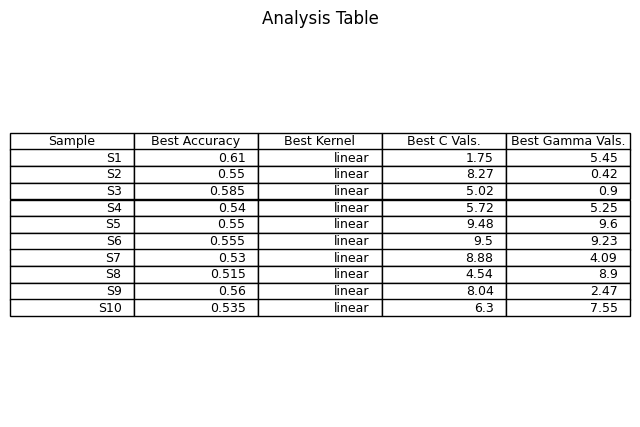

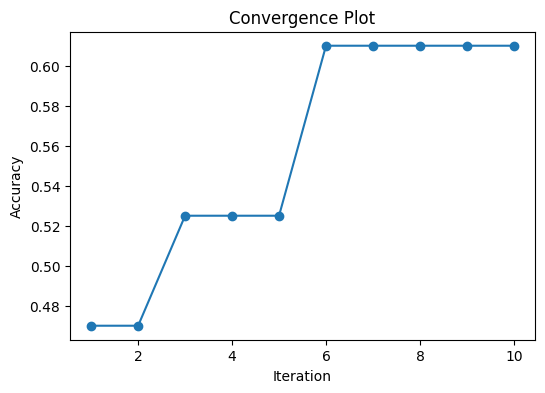

In [16]:
# Create separate figures for the table and plot
fig_table, ax_table = plt.subplots(figsize=(8, 5))
fig_plot, ax_plot = plt.subplots(figsize=(6, 4))

# Creating The Analysis Table
table = ax_table.table(cellText=df_transposed.values,
          colLabels=df_transposed.columns,
          loc='center')
ax_table.axis('off')  # Hide the axes
table.auto_set_font_size(False)
table.set_fontsize(9)
ax_table.set_title('Analysis Table')

# Creating The Analysis Plot for Sample with highest Best Accuracy
ax_plot.plot(range(1, len(overall_best_sample_past_accuracies) + 1), overall_best_sample_past_accuracies, marker='o')
ax_plot.set_title('Convergence Plot')
ax_plot.set_xlabel('Iteration')
ax_plot.set_ylabel('Accuracy')
plt.show()